In [19]:
import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import sklearn
from tensorflow.keras import datasets, layers, models

In [20]:
mat_data = h5py.File('C:/Users/AlanA/ASSIP/saroja/images/1500.mat')
print(list(mat_data.keys()))

['cjdata']


In [21]:
if 'cjdata' in mat_data:
    group = mat_data['cjdata']
    print(list(group.keys()))
else:
    print('cjdata not found in file.')

['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


In [22]:
key_name = 'label'
data = mat_data['cjdata'][key_name][:]
print(data)

[[3.]]


In [23]:
for key in mat_data['cjdata'].keys():
    print(f"Data for key {key}:")
    data = mat_data['cjdata'][key][:]
    print(data)

Data for key PID:
[[49]
 [48]
 [51]
 [52]
 [55]
 [56]]
Data for key image:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  5 10 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Data for key label:
[[3.]]
Data for key tumorBorder:
[[243.51219512 190.88501742 236.37630662 196.2369338  233.70034843
  202.48083624 231.02439024 211.40069686 231.02439024 218.53658537
  231.91637631 222.99651568 231.91637631 230.13240418 226.56445993
  243.51219512 228.34843206 255.10801394 239.05226481 263.1358885
  247.08013937 267.59581882 256.         270.271777   268.48780488
  270.271777   280.08362369 260.45993031 284.54355401 255.10801394
  286.32752613 239.05226481 278.29965157 226.56445993 275.62369338
  221.21254355 274.73170732 214.07665505 274.73170732 208.72473868
  272.05574913 196.2369338  263.1358885  190.88501742 256.
  190.88501742 246.18815331 190.88501742 242.62020906 193.56097561]]
Data for key tumorMask:
[[0 0 0 ... 0 0 0]
 [0 0 0 ..

In [24]:
for key in mat_data['cjdata'].keys():
    data = mat_data['cjdata'][key]
    print(f"The shape of the data in key {key}: {data.shape} ")

The shape of the data in key PID: (6, 1) 
The shape of the data in key image: (512, 512) 
The shape of the data in key label: (1, 1) 
The shape of the data in key tumorBorder: (1, 50) 
The shape of the data in key tumorMask: (512, 512) 


In [25]:
import math
cjdata = mat_data['cjdata']
image = cjdata['image'][:]
tumor_mask = cjdata['tumorMask'][:]
print(image[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

<function matplotlib.pyplot.show(close=None, block=None)>

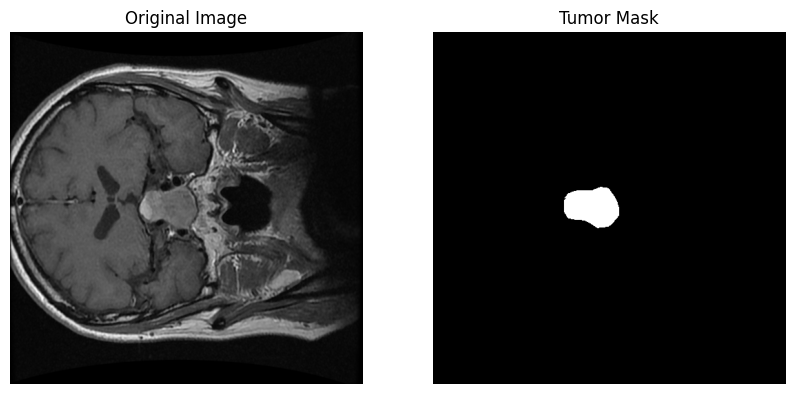

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Tumor Mask')
plt.axis('off')
plt.imshow(tumor_mask, cmap = 'grey')
plt.show

In [35]:
import matplotlib.pyplot as plt

# Assuming image and tumor_mask are already loaded

#image_height, image_width = 32,16 # Set the dimensions you want to reshape to (e.g., 32x16)

#plt.figure(figsize=(15, 50))  # Adjust figure size to fit all images

# Loop through the first 10 images
#for i in range(10):
    # Reshape the 1D image and tumor mask to 2D
    #reshaped_image = image[i].reshape(image_height, image_width)
    #reshaped_mask = tumor_mask[i].reshape(image_height, image_width)
    
    # Plot the original image
    #plt.subplot(10, 2, 2 * i + 1)
    #plt.title(f'Original Image {i + 1}')
    #plt.axis('off')
    #plt.imshow(reshaped_image, cmap='gray')
    
    # Plot the tumor mask
    #plt.subplot(10, 2, 2 * i + 2)
    #plt.title(f'Tumor Mask {i + 1}')
    #plt.axis('off')
    #plt.imshow(reshaped_mask, cmap='gray')

#plt.tight_layout()
#plt.show()


In [28]:
from PIL import Image
import os

In [67]:
sample_data = []
def randomFiles(folder_path, num_files):
    file_list = os.listdir(folder_path)
    selected_files = random.sample(file_list, num_files)
    sample_data.extend(selected_files)
    return selected_files
folder_path = r"C:\Users\AlanA\ASSIP\saroja\images"
numFiles = 50

randomMatFiles = randomFiles(r"C:\Users\AlanA\ASSIP\saroja\images", numFiles)
print(sample_data)

['1631.mat', '2471.mat', '1871.mat', '292.mat', '528.mat', '1478.mat', '722.mat', '742.mat', '639.mat', '923.mat', '152.mat', '133.mat', '933.mat', '2992.mat', '1582.mat', '2761.mat', '1294.mat', '2372.mat', '442.mat', '406.mat', '2690.mat', '2379.mat', '1045.mat', '310.mat', '2050.mat', '334.mat', '1390.mat', '1042.mat', '2463.mat', '1726.mat', '1988.mat', '2394.mat', '681.mat', '730.mat', '1860.mat', '1780.mat', '879.mat', '2519.mat', '1325.mat', '1843.mat', '2096.mat', '772.mat', '931.mat', '1374.mat', '1312.mat', '871.mat', '1425.mat', '561.mat', '90.mat', '2062.mat']


In [65]:
def rotate90(array):
    return np.rot90(array)
    #for i in range(len(array)):
        #for j in range(i, len(array)):
            #array[i][j], array[j][i] = array[j][i], array[i][j]
    #rotated = np.flip(array, axis = 1)
    #return(rotated)

array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(rotate90(array1))

[[3 6 9]
 [2 5 8]
 [1 4 7]]


In [42]:
def verticalFlip(array):
    flipped = np.flip(array, axis = 0)
    return flipped
#array2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
#print(verticalFlip(array2))

In [80]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

mat_files_dir = r"C:\Users\AlanA\ASSIP\saroja\images"

# Lists for images and labels
images = []
labels = []

# Loop to load data
for file_name in randomMatFiles: 
    file_path = os.path.join(mat_files_dir, file_name)
    with h5py.File(file_path, 'r') as mat_file:
        image = np.array(mat_file['cjdata']['image'])  
        label = np.array(mat_file['cjdata']['label'])       

        image = cv2.resize(image, (512, 512))
            
        images.append(image)
        labels.append(label-1)

augmented_images = images.copy()
augmented_labels = labels.copy()

for i in range(len(images)):
    augmented_images.append(rotate90(images[i]))
    augmented_labels.append(label-1)

for i in range(len(images)):
    augmented_images.append(verticalFlip(images[i]))
    augmented_labels.append(label -1)
    
# Convert to numpy arrays
images = np.array(augmented_images)
labels = np.array(augmented_labels).squeeze()

# Normalize images
images = images / 255.0

images = np.expand_dims(images, axis = -1)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)
#print(len(images))
#print(len(labels))

(30, 512, 512, 1)
(30,)
(120, 512, 512, 1)
(120,)


In [78]:
# Define the input shape
input_shape = (512, 512, 1)

# Create a sequential model
model = models.Sequential()

# First layer (Input)
model.add(layers.Input(shape=input_shape))

model.add(layers.MaxPooling2D((2,2), strides = (2,2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', strides=(2, 2), padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', strides=(1, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', strides=(1, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


# Print the model summary


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 128, 128, 16)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,198,659 (8.39 MB)

 Trainable params: 2,198,659 (8.39 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8235 - loss: 0.8028 - val_accuracy: 0.8000 - val_loss: 0.6076
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8402 - loss: 0.5157 - val_accuracy: 0.8000 - val_loss: 0.5904
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8069 - loss: 0.5318 - val_accuracy: 0.8000 - val_loss: 0.5746
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8215 - loss: 0.4845 - val_accuracy: 0.8000 - val_loss: 0.5504
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8090 - loss: 0.4480 - val_accuracy: 0.8000 - val_loss: 0.5141
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7954 - loss: 0.4297 - val_accuracy: 0.8000 - val_loss: 0.5000
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8217 - loss: 0.3594 - val_accuracy: 0.8000 - val_loss: 0.4355
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8706 - loss: 0.2873 - val_accuracy: 0.8000 - val_loss: